In [35]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

% matplotlib inline

In [36]:
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

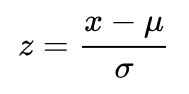

In [37]:
# Standarization 
# mean = 1, variance = 1

# X = (X - np.mean(X)) / np.std(X)
X = StandardScaler().fit_transform(X)

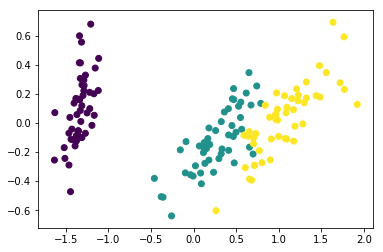

In [38]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
reduced_X = pca.transform(X)

plt.scatter(reduced_X[:,0], reduced_X[:,1], c=y)
plt.show()

# 3D로 표현

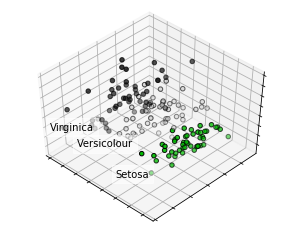

In [3]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()